<a href="https://colab.research.google.com/github/Anushkadas0407/Anushkadas0407/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUANTUM SENTIMENT ANALYSIS

1. Text: "This product is absolutely amazing and I love it!"
   Sentiment: Neutral
   Scores - Positive: 0.03, Negative: 0.04, Neutral: 0.93
   Quantum states: {'11': 38, '00': 29, '10': 466, '01': 467}

2. Text: "Terrible experience, would not recommend at all."
   Sentiment: Neutral
   Scores - Positive: 0.48, Negative: 0.00, Neutral: 0.52
   Quantum states: {'00': 482, '10': 518}

3. Text: "It's okay, nothing special but not bad either."
   Sentiment: Positive
   Scores - Positive: 0.50, Negative: 0.00, Neutral: 0.50
   Quantum states: {'00': 502, '10': 498}

4. Text: "The best purchase I've ever made, so happy!"
   Sentiment: Neutral
   Scores - Positive: 0.04, Negative: 0.02, Neutral: 0.93
   Quantum states: {'11': 24, '00': 43, '10': 480, '01': 453}

5. Text: "Awful quality and poor customer service."
   Sentiment: Neutral
   Scores - Positive: 0.47, Negative: 0.04, Neutral: 0.49
   Quantum states: {'11': 38, '01': 42, '00': 472, '10': 448}

6. Text: "

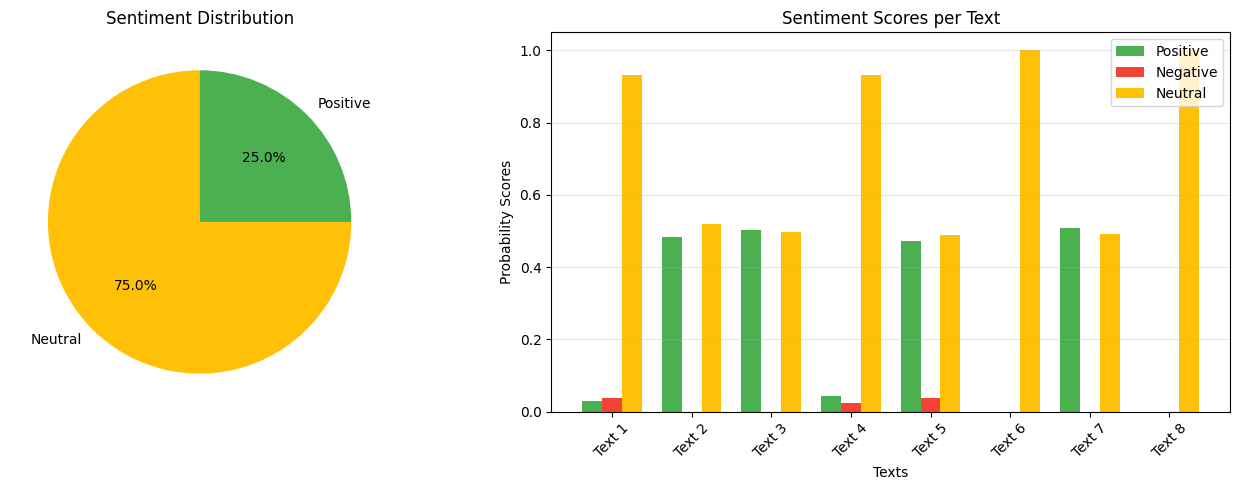


Analysis complete!


In [19]:


# Installation commands (run these first in your environment):
# pip install qiskit qiskit-aer numpy matplotlib

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from collections import Counter
import matplotlib.pyplot as plt

class QuantumSentimentAnalyzer:
    def __init__(self):
        self.simulator = AerSimulator()

    def text_to_features(self, text):
        """Convert text to simple numerical features"""
        text = text.lower()

        # Positive words
        pos_words = ['good', 'great', 'excellent', 'amazing', 'wonderful',
                     'love', 'best', 'perfect', 'happy', 'fantastic']
        # Negative words
        neg_words = ['bad', 'terrible', 'awful', 'horrible', 'hate',
                     'worst', 'poor', 'disappointing', 'sad', 'angry']

        pos_count = sum(1 for word in pos_words if word in text)
        neg_count = sum(1 for word in neg_words if word in text)

        # Normalize to [0, pi] range for quantum angles
        total = pos_count + neg_count + 1  # Add 1 to avoid division by zero
        pos_angle = (pos_count / total) * np.pi
        neg_angle = (neg_count / total) * np.pi

        return pos_angle, neg_angle

    def create_quantum_circuit(self, pos_angle, neg_angle):
        """Create quantum circuit for sentiment analysis"""
        qr = QuantumRegister(2, 'q')
        cr = ClassicalRegister(2, 'c')
        qc = QuantumCircuit(qr, cr)

        # Encode features using rotation gates
        qc.ry(pos_angle, qr[0])  # Positive sentiment encoding
        qc.ry(neg_angle, qr[1])  # Negative sentiment encoding

        # Entangle qubits
        qc.cx(qr[0], qr[1])

        # Add interference
        qc.h(qr[0])
        qc.cx(qr[0], qr[1])
        qc.h(qr[0])

        # Measure
        qc.measure(qr, cr)

        return qc

    def analyze_sentiment(self, text):
        """Analyze sentiment of a single text"""
        pos_angle, neg_angle = self.text_to_features(text)
        qc = self.create_quantum_circuit(pos_angle, neg_angle)

        # Run circuit
        job = self.simulator.run(qc, shots=1000)
        result = job.result()
        counts = result.get_counts()

        # Interpret results
        # '00' = positive, '11' = negative, '01'/'10' = neutral
        positive_score = counts.get('00', 0) / 1000
        negative_score = counts.get('11', 0) / 1000
        neutral_score = (counts.get('01', 0) + counts.get('10', 0)) / 1000

        if positive_score > negative_score and positive_score > neutral_score:
            sentiment = "Positive"
        elif negative_score > positive_score and negative_score > neutral_score:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"

        return sentiment, positive_score, negative_score, neutral_score, counts

# Sample dataset
dataset = [
    "This product is absolutely amazing and I love it!",
    "Terrible experience, would not recommend at all.",
    "It's okay, nothing special but not bad either.",
    "The best purchase I've ever made, so happy!",
    "Awful quality and poor customer service.",
    "Great value for money, highly recommended!",
    "Disappointing and not worth the price.",
    "Perfect! Exactly what I was looking for."
]

# Run analysis
print("=" * 60)
print("QUANTUM SENTIMENT ANALYSIS")
print("=" * 60)

analyzer = QuantumSentimentAnalyzer()

results = []
for i, text in enumerate(dataset, 1):
    sentiment, pos, neg, neu, counts = analyzer.analyze_sentiment(text)
    results.append({
        'text': text,
        'sentiment': sentiment,
        'positive': pos,
        'negative': neg,
        'neutral': neu
    })

    print(f"\n{i}. Text: \"{text}\"")
    print(f"   Sentiment: {sentiment}")
    print(f"   Scores - Positive: {pos:.2f}, Negative: {neg:.2f}, Neutral: {neu:.2f}")
    print(f"   Quantum states: {counts}")

# Visualization
print("\n" + "=" * 60)
print("GENERATING VISUALIZATION...")
print("=" * 60)

sentiments = [r['sentiment'] for r in results]
sentiment_counts = Counter(sentiments)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = {'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'}
ax1.pie(sentiment_counts.values(), labels=sentiment_counts.keys(),
        autopct='%1.1f%%', startangle=90,
        colors=[colors[s] for s in sentiment_counts.keys()])
ax1.set_title('Sentiment Distribution')

# Bar chart
texts_short = [f"Text {i+1}" for i in range(len(results))]
pos_scores = [r['positive'] for r in results]
neg_scores = [r['negative'] for r in results]
neu_scores = [r['neutral'] for r in results]

x = np.arange(len(texts_short))
width = 0.25

ax2.bar(x - width, pos_scores, width, label='Positive', color='#4CAF50')
ax2.bar(x, neg_scores, width, label='Negative', color='#F44336')
ax2.bar(x + width, neu_scores, width, label='Neutral', color='#FFC107')

ax2.set_xlabel('Texts')
ax2.set_ylabel('Probability Scores')
ax2.set_title('Sentiment Scores per Text')
ax2.set_xticks(x)
ax2.set_xticklabels(texts_short, rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAnalysis complete!")

In [22]:
!pip install qiskit qiskit-aer numpy matplotlib scikit-learn seaborn

QUANTUM NLP SENTIMENT ANALYSIS - 1v1 CLASSIFICATION

>>> Selected Dataset: happy_vs_sad
✓ Loaded 8 samples
✓ Label distribution: Class 0=4, Class 1=4
✓ Vocabulary built: 15 unique words
✓ Grammar rules defined
✓ Extracted features: 8 samples with 2 features each
✓ Quantum circuit encoder defined
✓ Train set: 5 samples
✓ Test set: 3 samples

TRAINING WITH SPSA OPTIMIZER

>>> Training on QASM Simulator...
  Iteration 5: Cost = 0.0000
  Iteration 10: Cost = 0.0000
  Iteration 15: Cost = 0.0000
  Iteration 20: Cost = 0.0000
  Iteration 25: Cost = 0.0000
  Iteration 30: Cost = 0.0000
✓ QASM Training complete. Final cost: 0.0000

>>> Training on Statevector Simulator...
  Iteration 5: Cost = 0.4000
  Iteration 10: Cost = 0.4000
  Iteration 15: Cost = 0.4000
  Iteration 20: Cost = 0.4000
  Iteration 25: Cost = 0.4000
  Iteration 30: Cost = 0.4000
✓ Statevector Training complete. Final cost: 0.4000

TESTING AND EVALUATION

>>> QASM Simulator Results:
  Train Accuracy: 1.0000
  Test Accuracy: 1

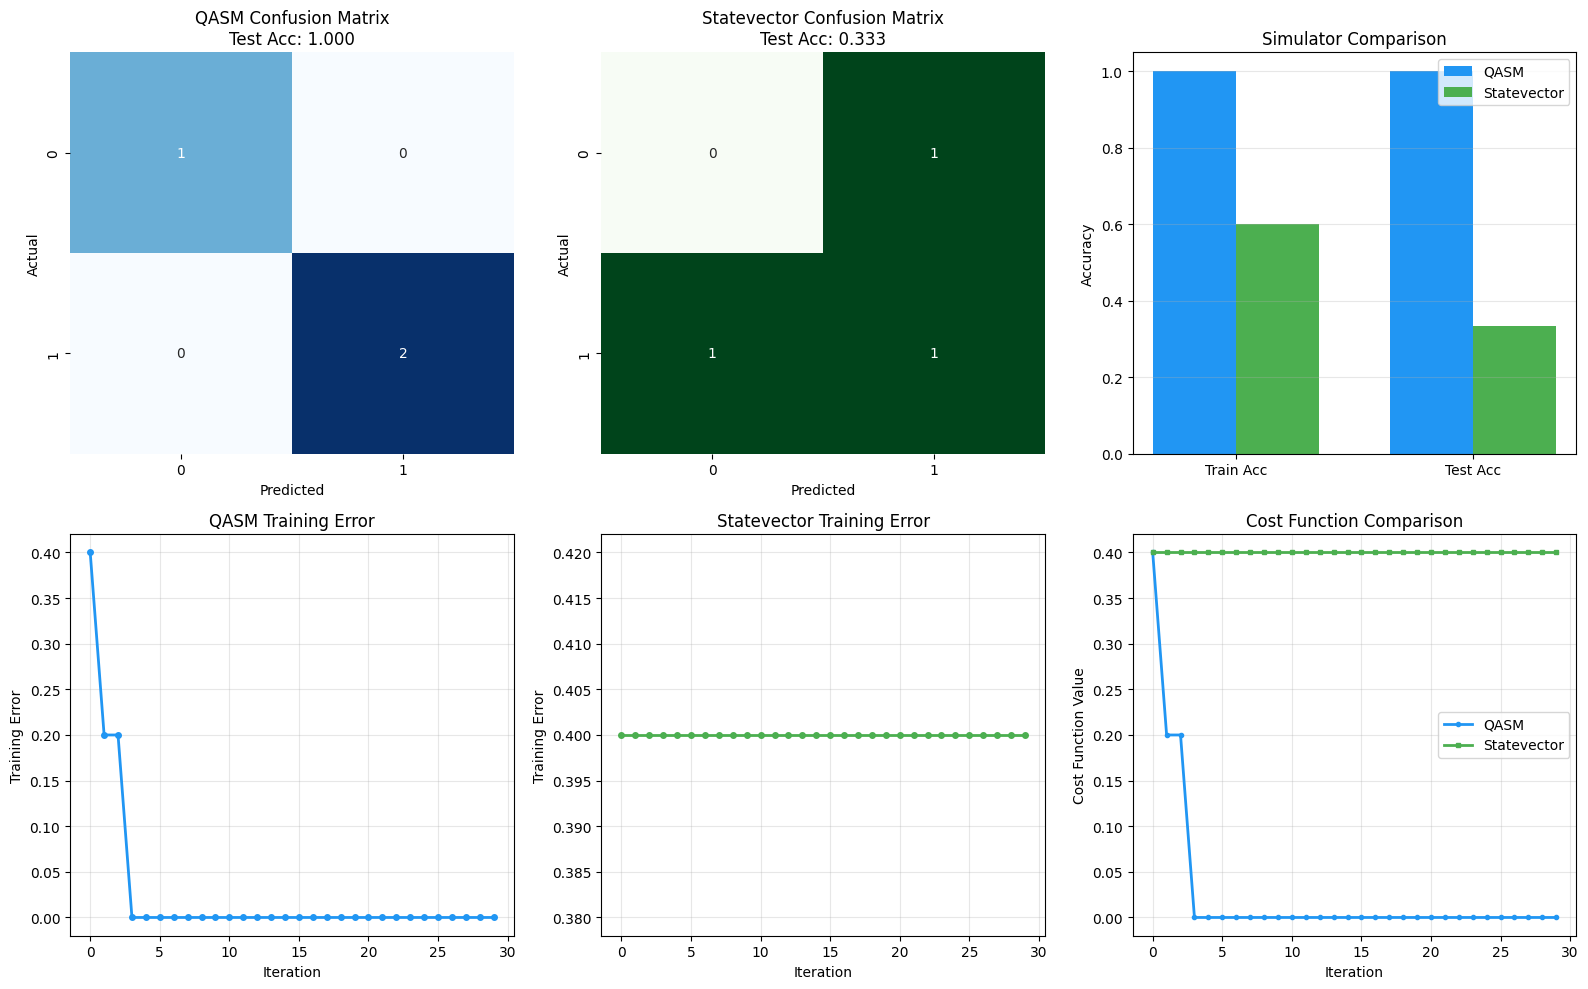


FINAL SUMMARY
Dataset: happy_vs_sad
Total Samples: 8 (Train: 5, Test: 3)

QASM Simulator:
  Final Training Error: 0.0000
  Test Accuracy: 1.0000

Statevector Simulator:
  Final Training Error: 0.4000
  Test Accuracy: 0.3333


In [24]:
"""
Quantum NLP Sentiment Analysis - 1v1 Classification
Following exact steps: Vocab → Grammar → Processing → Circuits → Test Set → SPSA → Analysis
Compares QASM Simulator vs Statevector Simulator with Confusion Matrix
"""

# Installation: pip install qiskit qiskit-aer numpy matplotlib scikit-learn seaborn

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

# ============================================================================
# MANUAL SPSA OPTIMIZER IMPLEMENTATION
# ============================================================================
class SPSA:
    """Simple SPSA optimizer implementation"""
    def __init__(self, maxiter=50, a=0.628, c=0.1, A=None):
        self.maxiter = maxiter
        self.a = a
        self.c = c
        self.A = A if A is not None else maxiter // 10

    def minimize(self, fun, x0, callback=None):
        """Minimize the objective function"""
        theta = np.array(x0)
        n_params = len(theta)

        for k in range(self.maxiter):
            # SPSA parameters
            ak = self.a / (k + 1 + self.A) ** 0.602
            ck = self.c / (k + 1) ** 0.101

            # Random perturbation
            delta = 2 * np.random.randint(0, 2, n_params) - 1

            # Function evaluations
            theta_plus = theta + ck * delta
            theta_minus = theta - ck * delta

            loss_plus = fun(theta_plus)
            loss_minus = fun(theta_minus)

            # Gradient approximation
            gradient = (loss_plus - loss_minus) / (2 * ck * delta)

            # Update parameters
            theta = theta - ak * gradient

            # Callback
            if callback is not None:
                current_loss = fun(theta)
                callback(k + 1, theta, current_loss, ak, True)

        final_loss = fun(theta)
        result = type('Result', (), {})()
        result.x = theta
        result.fun = final_loss
        return result

# ============================================================================
# STEP 1: DEFINE VOCABULARY
# ============================================================================
class QuantumNLPVocabulary:
    def __init__(self):
        self.vocab = {}
        self.word_to_idx = {}
        self.idx_to_word = {}

    def build_from_data(self, sentences):
        """Extract unique words from sentences"""
        unique_words = set()
        for sentence in sentences:
            words = sentence.lower().split()
            unique_words.update(words)

        self.vocab = sorted(list(unique_words))
        self.word_to_idx = {word: idx for idx, word in enumerate(self.vocab)}
        self.idx_to_word = {idx: word for word, idx in self.word_to_idx.items()}

        print(f"✓ Vocabulary built: {len(self.vocab)} unique words")
        return self.vocab

# ============================================================================
# STEP 2: DEFINE GRAMMAR
# ============================================================================
class QuantumGrammar:
    def __init__(self):
        self.grammar_rules = {
            'SUBJECT': ['kid', 'woman', 'man', 'old', 'young'],
            'EMOTION': ['happy', 'sad', 'angry', 'scared', 'joyful', 'cheerful',
                       'miserable', 'gloomy', 'downcast', 'morose', 'furious',
                       'irascible', 'terrified', 'frightened'],
            'ACTION': ['entertains', 'grieves', 'irritates', 'startles',
                      'laughs', 'cries', 'shouts', 'snaps'],
            'TARGET': ['man', 'woman', 'kid']
        }

    def parse_sentence(self, sentence):
        """Parse sentence into grammatical components"""
        words = sentence.lower().split()
        parsed = {
            'subject': [],
            'emotion': [],
            'action': [],
            'target': []
        }

        for word in words:
            if word in self.grammar_rules['SUBJECT']:
                parsed['subject'].append(word)
            if word in self.grammar_rules['EMOTION']:
                parsed['emotion'].append(word)
            if word in self.grammar_rules['ACTION']:
                parsed['action'].append(word)
            if word in self.grammar_rules['TARGET']:
                parsed['target'].append(word)

        return parsed

    def extract_features(self, sentence):
        """Extract feature vector from parsed sentence"""
        parsed = self.parse_sentence(sentence)
        features = []

        # Emotion encoding (most important for sentiment)
        emotion_map = {
            'happy': 1.0, 'joyful': 0.9, 'cheerful': 0.85,
            'sad': -0.8, 'miserable': -0.9, 'gloomy': -0.85, 'downcast': -0.8, 'morose': -0.85,
            'angry': -0.7, 'furious': -0.95, 'irascible': -0.85,
            'scared': -0.6, 'terrified': -0.9, 'frightened': -0.75
        }

        emotion_score = sum([emotion_map.get(e, 0) for e in parsed['emotion']]) / (len(parsed['emotion']) + 1)

        # Action encoding
        action_map = {
            'entertains': 0.8, 'laughs': 0.9,
            'grieves': -0.8, 'cries': -0.7,
            'irritates': -0.6, 'startles': -0.5,
            'shouts': -0.4, 'snaps': -0.5
        }

        action_score = sum([action_map.get(a, 0) for a in parsed['action']]) / (len(parsed['action']) + 1)

        features = [emotion_score, action_score]
        return features

print("=" * 80)
print("QUANTUM NLP SENTIMENT ANALYSIS - 1v1 CLASSIFICATION")
print("=" * 80)

# ============================================================================
# STEP 3: PROCESS THE DATA
# ============================================================================
def load_dataset(filepath_or_content):
    """Load and process dataset"""
    sentences = []
    labels = []

    lines = filepath_or_content.strip().split('\n')
    for line in lines:
        if not line.strip():
            continue
        parts = line.rsplit('_', 1)
        if len(parts) == 2:
            sentence = parts[0].strip()
            label = int(parts[1].split('_')[-1])
            sentences.append(sentence)
            labels.append(label)

    return sentences, labels

# Load all datasets
datasets = {
    'sad_vs_scared': """miserable kid grieves man._tra_0
woman startles old woman._tra_1
old woman grieves man._tra_0
terrified man startles kid._tra_1
miserable woman grieves woman._tra_0
terrified kid startles man._tra_1
frightened woman cries._int_1
terrified man cries._int_1""",

    'angry_vs_scared': """furious kid irritates man._tra_0
woman startles old woman._tra_1
irascible kid snaps._int_0
terrified man startles kid._tra_1
furious kid snaps._int_0
frightened woman cries._int_1
terrified man cries._int_1
irascible woman snaps._int_0""",

    'happy_vs_angry': """furious kid irritates man._tra_1
kid entertains woman._tra_0
irascible kid snaps._int_1
cheerful woman laughs._int_0
woman entertains joyful woman._tra_0
furious kid shouts._int_1
joyful woman entertains man._tra_0
irascible woman snaps._int_1""",

    'happy_vs_sad': """miserable kid grieves man._tra_1
kid entertains woman._tra_0
morose kid grieves kid._tra_1
cheerful woman laughs._int_0
woman entertains joyful woman._tra_0
miserable man shouts._int_1
joyful woman entertains man._tra_0
gloomy woman grieves woman._tra_1""",

    'happy_vs_scared': """woman startles old woman._tra_1
kid entertains woman._tra_0
terrified man startles kid._tra_1
cheerful woman laughs._int_0
woman entertains joyful woman._tra_0
frightened woman cries._int_1
joyful woman entertains man._tra_0
terrified kid shouts._int_1""",

    'sad_vs_angry': """miserable kid grieves man._tra_0
furious kid irritates man._tra_1
old woman grieves man._tra_0
irascible kid snaps._int_1
morose kid grieves kid._tra_0
furious kid snaps._int_1
woman irritates woman._tra_1
miserable man shouts._int_0"""
}

# Choose dataset for analysis
DATASET_NAME = 'happy_vs_sad'  # Change this to test different datasets
print(f"\n>>> Selected Dataset: {DATASET_NAME}")

sentences, labels = load_dataset(datasets[DATASET_NAME])
print(f"✓ Loaded {len(sentences)} samples")
print(f"✓ Label distribution: Class 0={labels.count(0)}, Class 1={labels.count(1)}")

# Initialize vocabulary and grammar
vocab = QuantumNLPVocabulary()
vocab.build_from_data(sentences)

grammar = QuantumGrammar()
print("✓ Grammar rules defined")

# Extract features
features = [grammar.extract_features(s) for s in sentences]
print(f"✓ Extracted features: {len(features)} samples with {len(features[0])} features each")

# ============================================================================
# STEP 4: WORDS INTO QUANTUM CIRCUITS
# ============================================================================
def create_feature_map(features, params):
    """Create quantum feature map circuit"""
    n_qubits = 2
    qc = QuantumCircuit(n_qubits)

    # Encode features
    qc.ry(features[0] * np.pi, 0)
    qc.ry(features[1] * np.pi, 1)

    # Entanglement
    qc.cx(0, 1)

    # Parameterized ansatz
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.cx(0, 1)
    qc.ry(params[2], 0)
    qc.ry(params[3], 1)

    return qc

def create_measurement_circuit(feature_circuit):
    """Add measurements to circuit"""
    qc = feature_circuit.copy()
    qc.measure_all()
    return qc

print("✓ Quantum circuit encoder defined")

# ============================================================================
# STEP 5: OBTAIN TEST SET
# ============================================================================
train_size = int(0.7 * len(features))
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

print(f"✓ Train set: {len(train_features)} samples")
print(f"✓ Test set: {len(test_features)} samples")

# ============================================================================
# STEP 6: DEFINE FUNCTION TO OBTAIN RESULT
# ============================================================================
def get_prediction(params, feature, simulator):
    """Get prediction from quantum circuit"""
    qc = create_feature_map(feature, params)
    qc.measure_all()

    job = simulator.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts()

    # Calculate expectation value
    expectation = 0
    for bitstring, count in counts.items():
        parity = bitstring.count('1') % 2
        sign = 1 if parity == 0 else -1
        expectation += sign * count / 1000

    # Map to binary classification
    prediction = 1 if expectation < 0 else 0
    return prediction

# ============================================================================
# STEP 7: PUT IT THROUGH SPSA OPTIMIZER
# ============================================================================
def cost_function(params, features, labels, simulator):
    """Cost function for optimization"""
    predictions = [get_prediction(params, f, simulator) for f in features]
    accuracy = sum([1 for p, l in zip(predictions, labels) if p == l]) / len(labels)
    return 1 - accuracy  # Minimize error

print("\n" + "=" * 80)
print("TRAINING WITH SPSA OPTIMIZER")
print("=" * 80)

# Initialize parameters
np.random.seed(42)
initial_params = np.random.uniform(0, 2*np.pi, 4)

# QASM Simulator Training
print("\n>>> Training on QASM Simulator...")
qasm_simulator = AerSimulator()
spsa_qasm = SPSA(maxiter=30)

training_errors_qasm = []
def callback_qasm(nfev, params, fval, stepsize, accepted):
    training_errors_qasm.append(fval)
    if nfev % 5 == 0:
        print(f"  Iteration {nfev}: Cost = {fval:.4f}")

result_qasm = spsa_qasm.minimize(
    fun=lambda p: cost_function(p, train_features, train_labels, qasm_simulator),
    x0=initial_params,
    callback=callback_qasm
)

optimal_params_qasm = result_qasm.x
print(f"✓ QASM Training complete. Final cost: {result_qasm.fun:.4f}")

# Statevector Simulator Training
print("\n>>> Training on Statevector Simulator...")
statevector_simulator = AerSimulator(method='statevector')
spsa_statevector = SPSA(maxiter=30)

training_errors_statevector = []
def callback_statevector(nfev, params, fval, stepsize, accepted):
    training_errors_statevector.append(fval)
    if nfev % 5 == 0:
        print(f"  Iteration {nfev}: Cost = {fval:.4f}")

result_statevector = spsa_statevector.minimize(
    fun=lambda p: cost_function(p, train_features, train_labels, statevector_simulator),
    x0=initial_params,
    callback=callback_statevector
)

optimal_params_statevector = result_statevector.x
print(f"✓ Statevector Training complete. Final cost: {result_statevector.fun:.4f}")

# ============================================================================
# STEP 8: ANALYZE RESULTS THROUGH CONFUSION MATRIX
# ============================================================================
print("\n" + "=" * 80)
print("TESTING AND EVALUATION")
print("=" * 80)

# QASM Predictions
print("\n>>> QASM Simulator Results:")
qasm_train_preds = [get_prediction(optimal_params_qasm, f, qasm_simulator) for f in train_features]
qasm_test_preds = [get_prediction(optimal_params_qasm, f, qasm_simulator) for f in test_features]

qasm_train_acc = accuracy_score(train_labels, qasm_train_preds)
qasm_test_acc = accuracy_score(test_labels, qasm_test_preds)
print(f"  Train Accuracy: {qasm_train_acc:.4f}")
print(f"  Test Accuracy: {qasm_test_acc:.4f}")

cm_qasm = confusion_matrix(test_labels, qasm_test_preds)
print("  Confusion Matrix:")
print(cm_qasm)

# Statevector Predictions
print("\n>>> Statevector Simulator Results:")
sv_train_preds = [get_prediction(optimal_params_statevector, f, statevector_simulator) for f in train_features]
sv_test_preds = [get_prediction(optimal_params_statevector, f, statevector_simulator) for f in test_features]

sv_train_acc = accuracy_score(train_labels, sv_train_preds)
sv_test_acc = accuracy_score(test_labels, sv_test_preds)
print(f"  Train Accuracy: {sv_train_acc:.4f}")
print(f"  Test Accuracy: {sv_test_acc:.4f}")

cm_statevector = confusion_matrix(test_labels, sv_test_preds)
print("  Confusion Matrix:")
print(cm_statevector)

# ============================================================================
# VISUALIZATION: CONFUSION MATRICES AND TRAINING CURVES
# ============================================================================
fig = plt.figure(figsize=(16, 10))

# Confusion Matrix - QASM
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm_qasm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
ax1.set_title(f'QASM Confusion Matrix\nTest Acc: {qasm_test_acc:.3f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Confusion Matrix - Statevector
ax2 = plt.subplot(2, 3, 2)
sns.heatmap(cm_statevector, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax2)
ax2.set_title(f'Statevector Confusion Matrix\nTest Acc: {sv_test_acc:.3f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# Comparison Bar Chart
ax3 = plt.subplot(2, 3, 3)
metrics = ['Train Acc', 'Test Acc']
qasm_scores = [qasm_train_acc, qasm_test_acc]
sv_scores = [sv_train_acc, sv_test_acc]
x = np.arange(len(metrics))
width = 0.35
ax3.bar(x - width/2, qasm_scores, width, label='QASM', color='#2196F3')
ax3.bar(x + width/2, sv_scores, width, label='Statevector', color='#4CAF50')
ax3.set_ylabel('Accuracy')
ax3.set_title('Simulator Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Training Error - QASM
ax4 = plt.subplot(2, 3, 4)
ax4.plot(training_errors_qasm, color='#2196F3', linewidth=2, marker='o', markersize=4)
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Training Error')
ax4.set_title('QASM Training Error')
ax4.grid(True, alpha=0.3)

# Training Error - Statevector
ax5 = plt.subplot(2, 3, 5)
ax5.plot(training_errors_statevector, color='#4CAF50', linewidth=2, marker='o', markersize=4)
ax5.set_xlabel('Iteration')
ax5.set_ylabel('Training Error')
ax5.set_title('Statevector Training Error')
ax5.grid(True, alpha=0.3)

# Cost Function Comparison
ax6 = plt.subplot(2, 3, 6)
ax6.plot(training_errors_qasm, label='QASM', color='#2196F3', linewidth=2, marker='o', markersize=3)
ax6.plot(training_errors_statevector, label='Statevector', color='#4CAF50', linewidth=2, marker='s', markersize=3)
ax6.set_xlabel('Iteration')
ax6.set_ylabel('Cost Function Value')
ax6.set_title('Cost Function Comparison')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "=" * 80)
print("FINAL SUMMARY")
print("=" * 80)
print(f"Dataset: {DATASET_NAME}")
print(f"Total Samples: {len(features)} (Train: {len(train_features)}, Test: {len(test_features)})")
print(f"\nQASM Simulator:")
print(f"  Final Training Error: {training_errors_qasm[-1]:.4f}")
print(f"  Test Accuracy: {qasm_test_acc:.4f}")
print(f"\nStatevector Simulator:")
print(f"  Final Training Error: {training_errors_statevector[-1]:.4f}")
print(f"  Test Accuracy: {sv_test_acc:.4f}")
print("=" * 80)